In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
import sympy as smp


$$
\frac{d \sigma}{d \Omega} = \frac{r_{e}^{2}}{2} \frac{1+cos^2\theta}{1+\alpha(1-cos\theta)^2} \left[ 1+\frac{\alpha(1-cos\theta)^2}{(1+cos^2 \theta)(1+\alpha(1-cos\theta))} \right]   
$$
* $r_e = 2.818 x10^{-15}$ m - radius of electron, classic
* $\alpha = \frac{E}{mc^2}$ - where E is the energy of the incomming photon and m is the mass of electron

* Part A: Compute $\frac{d \sigma}{d \theta}$
* Part B Compute $\sigma$
* Part C: Use $\frac{d \sigma}{d \theta}$ and $\sigma$ to fnd probability density
******** rt A

$$
\sigma = \int d \sigma = \int \frac{d \sigma}{d \Omega} d\Omega
$$
$$
= \int_{0}^{2\pi} \int_{0}^{\pi} \frac{d \sigma}{d\Omega}sin\theta d\theta d\phi 
$$
$$
\int_{0}^{\pi} \left( \int_{0}^{2\pi}\frac{d \sigma}{d\Omega}sin\theta d\phi \right) d\theta
$$
$$
\int_{0}^{\pi} \left( 2\pi\frac{d \sigma}{d\Omega}sin\theta \right) d\theta
$$
$$
\frac{d \sigma}{d\theta}= 2\pi \frac{d\sigma}{d\Omega} sin\theta
$$

In [4]:
theta, alpha = smp.symbols(r'\theta \alpha', real = True, positive = True)

In [8]:
dsdo =smp.Rational(1,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
(1+alpha**2*(1-smp.cos(theta))**2/((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
dsdo

(\alpha**2*(1 - cos(\theta))**2/((\alpha*(1 - cos(\theta)) + 1)*(cos(\theta)**2 + 1)) + 1)*(cos(\theta)**2/2 + 1/2)/(\alpha*(1 - cos(\theta)) + 1)**2

In [9]:
dsdt = 2*smp.pi*dsdo*smp.sin(theta)
dsdt=dsdt.simplify()
dsdt

pi*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

In [10]:
s = smp.integrate(dsdt, (theta, 0, smp.pi))
s

-pi*(log(-1/\alpha)/\alpha - 1/(2*\alpha) - 2*log(-1/\alpha)/\alpha**2 - 5/\alpha**2 - 2*log(-1/\alpha)/\alpha**3 - 3/\alpha**3) + pi*(8*\alpha**4*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 8*\alpha**3*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 8*\alpha**3/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 30*\alpha**2*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 33*\alpha**2/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 20*\alpha*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 26*\alpha/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 4*log(-2 - 1/\alpha)/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3) - 6/(8*\alpha**5 + 8*\alpha**4 + 2*\alpha**3))

In [13]:
s = s.simplify().simplify()
s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

# Part C
* Extremely Important Point: If the flux of particles is uniform then 
$$p(\theta) = f(\theta)d\theta \approx \frac{d\sigma}{d\theta}d\theta$$
* so we can write 
$$
f(\theta) = C\frac{d\sigma}{d\theta}
$$
* Now we need to enforce $\int_{0}^{\pi}d\theta = 1$ so this means 
$$ 
1 = \int_{0}^{\pi}f(\theta) d\theta =C \int_{0}^{\pi}\frac{d\sigma}{d\theta} = C\sigma
$$

and $$C = 1/\sigma$$
$$$$
$$f(\theta) = \frac{1}{\sigma}\frac{d\sigma}{d\theta}$$

In [16]:
pdf_theta = dsdt/s
pdf_theta = pdf_theta.simplify()
pdf_theta

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

In [14]:
pdf_omega = dsdo/s
pdf_omega = pdf_omega.simplify()
pdf_omega

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

# creating numeric function from analitical

In [20]:
pdf_theta_f = smp.lambdify([theta, alpha], pdf_theta)
pdf_omega_f = smp.lambdify([theta, alpha], pdf_omega)

In [ ]:
# do the plot for alpha = 2

In [21]:
the = np.linspace(0, np.pi, 1000)
pdf_t = pdf_theta_f(the, 0.1)
pdf_o = pdf_omega_f(the, 0.1)

# use a ppolar plot for representation .where theta is the radius represents the probability.

Text(0.5, 1.0, '$g(\\theta, \\phi)$')

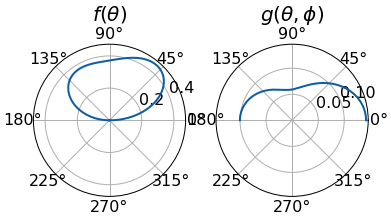

In [24]:
fig, axes = plt.subplots(1,2, subplot_kw ={'projection': 'polar'})
axes[0].plot(the, pdf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(the, pdf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=20)